<a href="https://colab.research.google.com/github/joeyuy/Seattle-Weather/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This notebook investigates the question of whether it rains more in New York or Seattle using the dataframe from: https://github.com/joeyuy/Seattle-Weather/blob/main/cleaned_sea_ny_rain.csv.


The above dataframe was created from cleaning and summarizing data from National Oceanic and Atmospheric Administration (NOAA) records from 2020 to 2024. All data can be accessed from: https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND.

## Upgrade altair

Colab runs altair on version 4.2.2 by default. The below code is necessary for colab to run altair on the most recent version (5.3).

In [3]:
!pip install altair --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.8/857.8 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: altair
    Found existing installation: altair 4.2.2
    Uninstalling altair-4.2.2:
      Successfully uninstalled altair-4.2.2


## Import libraries

Importing python dataframe and data visualization libraries to perform analysis.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

import altair as alt
from altair import datum

In [5]:
alt.__version__

'5.3.0'

Set custom theme for altair charts

In [6]:
def custom_theme():
    return {
        'config': {
            'view': {
                'width': 600,


            },
            "axis": {
                "titleColor": "navy",
                "labelColor": "navy",
                "labelFontSize": 16,
                "titleFontSize": 18,
            },
            "title": {
              "color": "navy",
              "fontSize": 28
            },
            "legend": {
              "titleColor": "navy",
              "labelColor" : "navy",
              "labelFontSize": 16,
              "titleFontSize": 18
            },
            'mark': {
                'color': 'cornflowerblue',
                'fill': 'cornflowerblue'
            }
        }
    }


# register the custom theme under a chosen name
alt.themes.register('custom_theme', custom_theme)


# enable the newly registered theme
alt.themes.enable('custom_theme')

ThemeRegistry.enable('custom_theme')

## Load clean data

##### $\rightarrow$ Load the clean data set from Github.

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/joeyuy/Seattle-Weather/main/cleaned_sea_ny_rain.csv')
df

,date,city,precipitation,month,season,class
0,2020-01-01,Seattle,0.162500,1,Winter,Light
1,2020-01-02,Seattle,0.181250,1,Winter,Light
2,2020-01-03,Seattle,0.267500,1,Winter,Moderate
3,2020-01-04,Seattle,0.172000,1,Winter,Light
4,2020-01-05,Seattle,0.168571,1,Winter,Light
...,...,...,...,...,...,...
2917,2023-12-27,New York,0.051538,12,Winter,Very Light
2918,2023-12-28,New York,1.845000,12,Winter,Very Heavy
2919,2023-12-29,New York,0.103571,12,Winter,Light
2920,2023-12-30,New York,0.006429,12,Winter,No Rain


##### $\rightarrow$ Review the contents of the data set.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2922 non-null   object 
 1   city           2922 non-null   object 
 2   precipitation  2922 non-null   float64
 3   month          2922 non-null   int64  
 4   season         2922 non-null   object 
 5   class          2922 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 137.1+ KB


In [15]:
print(df['precipitation'].max(), df['precipitation'].min())

4.2446153846153845 0.0


In [23]:
print(df['month'].unique(),'\n',
      df['season'].unique(),'\n',
      df['class'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 ['Winter' 'Spring' 'Summer' 'Fall'] 
 ['Light' 'Moderate' 'Moderate Heavy' 'Very Light' 'No Rain' 'Heavy'
 'Very Heavy']


## State your questions

The overall problem is to compare how much it rains in Seattle and New York City. To answer this general problem, you will need to ask specific questions about the data.


##### $\rightarrow$ List your questions about the data that will help you solve the problem.

1. What is the average rainfall per month in each city?

2. How many days of no rain, light rain, heavy rain, etc did each city experience in the 4 year period?

3. What is the typical precipitation amount in a given city, season, and rain intensity class?

4. How is rainy weather distributed in each season for both cities?

## Analysis

Perform analyses necessary to answer the questions. You will likely start by trying many things, some of which are useful and some of which are not. Don't be afraid to try different analyses at first. You will edit your notebook to a clean version that retains only the essential components at the end of the project.

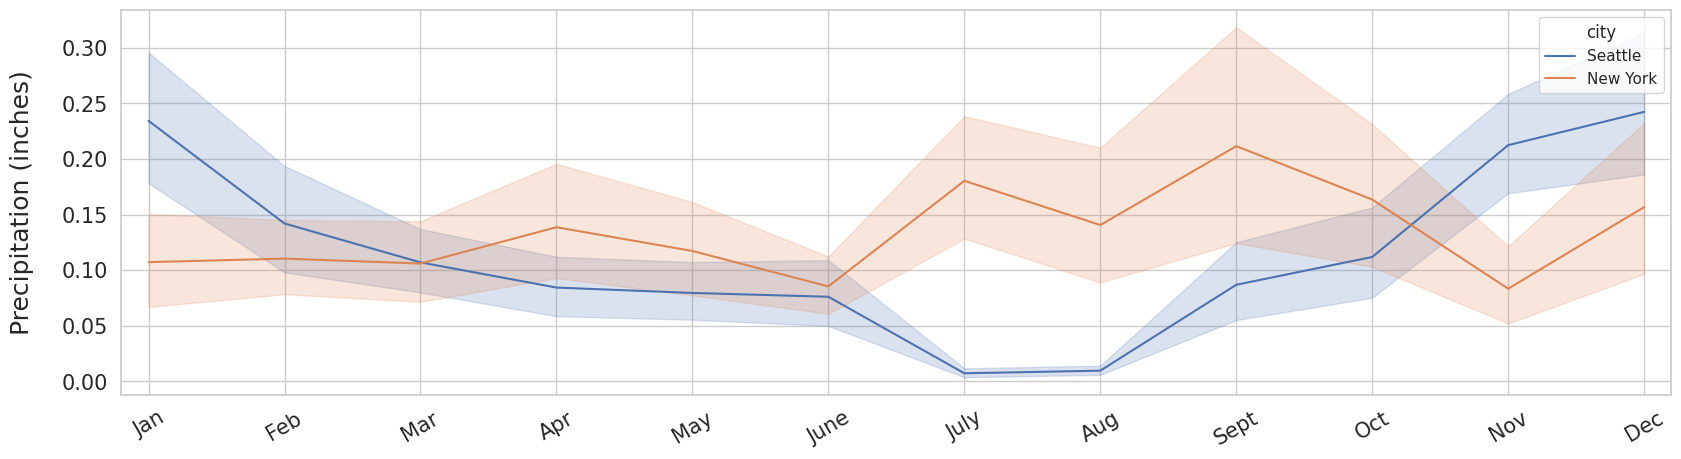

In [9]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel(None)
plt.ylabel('Precipitation (inches)', fontsize=18, labelpad=20)

plt.xticks(ticks=np.arange(12)+1, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], rotation=30)
plt.xlim(0.8, 12.2)
plt.tick_params(labelsize=15);

In [10]:
chart = alt.Chart(df).mark_bar().encode(
    alt.Y('count()',title = None),
    alt.X('city:N').axis(title = None, labels=False, ticks=False),
    alt.Color('city:N',title = 'City'),
    alt.Column('class:N',
               sort=['No Rain','Very Light','Light','Moderate','Moderate Heavy','Heavy','Very Heavy']
               ).header(title='Rain Classification')
).properties(title = 'Days of Rain Classes per City', width = 65)

chart.configure_header(
    labelFontSize = 13,
    labelOrient='bottom',
    labelColor='navy',
    labelAngle=0,
    labelPadding=25,
    titleFontSize=18,
    titleOrient='bottom',
    titleColor='navy'
)

alt.Chart(...)

In [11]:
base = alt.Chart(df).transform_joinaggregate(
    groupby=['class','season'],
    avgprecip = 'mean(precipitation)'
).encode(
    alt.Y('class:N').axis(title = None
                   ).scale(domain=['No Rain','Very Light','Light','Moderate','Moderate Heavy','Heavy','Very Heavy']),
    alt.X('season:N').axis(title = None, labelAngle=0
                    ).scale(domain=['Spring','Summer','Fall','Winter'])
)

heatmap1 = base.mark_rect().encode(
    alt.Color('average(precipitation):Q')
    .scale(scheme='purplebluegreen')
    .legend(title='Average Precipitation')
)

text1 = base.mark_text(baseline="middle").encode(
    text=alt.Text("avgprecip:Q",format=",.5f"),
    color = alt.condition(
        alt.datum.avgprecip > 1,
        alt.value('white'),
        alt.value('black')
    ))

heatmap2 = base.mark_rect().encode(
    alt.Color('average(precipitation)')
    .scale(scheme='purplebluegreen')
    .legend(title='Average Precipitation',titleFontSize=13,labelFontSize=13)
)

text2 = base.mark_text(baseline="middle").encode(
    text=alt.Text("avgprecip:Q",format=",.5f"),
    color = alt.condition(
        alt.datum.avgprecip > 1,
        alt.value('white'),
        alt.value('black')
    ))

chart1 = alt.layer(heatmap1, text1).properties(title = 'New York',
                                               width = 300, height = 400
                    ).transform_filter(datum.city == 'New York')
chart2 = alt.layer(heatmap2, text2).properties(title = 'Seattle',
                                               width = 300, height = 400
                    ).transform_filter(datum.city == 'Seattle')

alt.hconcat(chart1,chart2)

alt.HConcatChart(...)

In [12]:
base = alt.Chart(df).encode(
    alt.Theta("count()").stack(True),
    alt.Color("class:N").scale(domain=['No Rain','Very Light','Light','Moderate','Moderate Heavy','Heavy','Very Heavy'])
).properties(width = 180)

pie = base.mark_arc()
text = base.mark_text(radius=110, size=20).encode(text="count()")

chart = (pie+text).facet(
    column = alt.Column("season:N",
                        sort = ['Spring','Summer','Fall','Winter'],
                        title = 'Rainfall Distribution by City and Season'),
    row = alt.Row("city:N",title = None)
)

chart.configure_header(
    labelFontSize = 16,
    labelColor='navy',
    labelAngle = 0,
    titleFontSize=28,
    titleAngle = 0,
    titleColor='navy',
)


alt.FacetChart(...)

### Results for communication assignment

This file should clearly produce the graphs, tables, models, etc that appear in the communication assignment.

Plot 1 results:
- Seattle and NY have roughly equal precipitaitons from Feb to June. From July to Sept, Seattle has less precipitation, and from Nov to Jan, Seattle has more precipitation.
- Seattle has greater seasonal fluctuations in precipitation, but New York has higher extreme precipitation days.

Plot 2 results:
- Both cities do not differ much in number of days for each rain level class. However, New York has proportionally more very heavy rain days than Seattle.

Plot 3 results:
- Residents from each city can experience similar precipitation amounts in each season, except for New York having more extreme spring, summer, and fall storms, and Seattle having worse winter storms.

Plot 4 results:
- Seattle seems to have much sunnier summers but much rainier winters than New York.
- New York also has a very volatile fall season with the city's highest amounts of sunny and very heavy rainfall days.
- Almost all city-season combinations has no rain as the most frequent weather, except for Seattle Winters with very light rain being most frequent.
- Only Seattle summers and New York falls have a majority of no rain days.

## Conclusion

Provide a brief description of your conclusions.

1. For most of the year, there is very little difference in the total precipipitation experienced between Seattelites and New Yorkers.
2. New York storms reach more extreme precipitation levels than Seattle's.
3. Seattle has both the sunniest (275/368 no rain summer days) and least sunny (86/361 no rain winter days) seasons between both cities. New York's sunniest season is fall with only 205 no rain days, and its least sunny season is surprisingly summer with only 163 no rain days.

So overall:

New York can be argued to be less rainy because it does not have an extended period of time that features day after day of rain, unlike Seattle's winters. But at the same time, New York experiences worse extreme storms than Seattle.

Seattle can also be argued to be less rainy because it has the only season (summer) that comes close to a 75% no rain period. New York's best is only 56% in fall.

Hence, New York can be said to have consistently more rain and worst individual storm days, but the rainy season of Seattle is significantly worse than New York's. As such, the answer to the question depends on if a resident values the presence of sun (Seattle wins) or the absence of rain (New York wins).

